# Space Environment Pathways
This Jupyter Notebook will allow users to play around with the scenarios, in order to get to know the laucnh data.

If you would like to use the scen_properties of a pickle file, then this must be located under the first pyssem folder. In the same folder as model.py

In [89]:
import pandas as pd

path = '/Users/indigobrownhall/Code/pyssem/pyssem/utils/launch/data/ref_scen_SEP2.csv' # your path to the scenario csv file
T = pd.read_csv(path)

# Only use if required, you can run the model, it will save a pickle file and then you can use this to get the scenario data. 
import pickle
with open('../scenario-properties-baseline.pkl', 'rb') as f:
    scen_properties = pickle.load(f)

/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_98292/844593272.py:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  T = pd.read_csv(path)


0

In [95]:
scen_properties.species_names

['S',
 'N_0.00141372kg_e0.001',
 'N_0.00141372kg_e0.01',
 'N_0.00141372kg_e0.1',
 'N_0.00141372kg_e0.2',
 'N_6kg_e0.001',
 'N_6kg_e0.01',
 'N_6kg_e0.1',
 'N_6kg_e0.2',
 'N_20kg_e0.001',
 'N_20kg_e0.01',
 'N_20kg_e0.1',
 'N_20kg_e0.2',
 'N_148kg_e0.001',
 'N_148kg_e0.01',
 'N_148kg_e0.1',
 'N_148kg_e0.2',
 'B_e0.001',
 'B_e0.01',
 'B_e0.1',
 'B_e0.2']

Show all of the columns available, the data types and an example:

In [83]:
# print each column name, the data type and an example
for col in T.columns:
    print(f"Column: {col}")
    print(f"Data Type: {T[col].dtype}")
    print(f"Example: {T[col].iloc[0]}")
    print()

Column: obj_id
Data Type: int64
Example: 1

Column: phase_desc
Data Type: object
Example: debris/derelict

Column: phase
Data Type: int64
Example: 4

Column: par_id
Data Type: float64
Example: nan

Column: operating_agency
Data Type: object
Example: nan

Column: const_name
Data Type: object
Example: nan

Column: const_shell_id
Data Type: float64
Example: nan

Column: mass
Data Type: float64
Example: 1.47

Column: area
Data Type: float64
Example: 0.0214

Column: diam_lcola
Data Type: float64
Example: 0.165068

Column: diam_tumbl
Data Type: float64
Example: 0.131711

Column: diam_char
Data Type: float64
Example: 0.146674

Column: obj_type
Data Type: int64
Example: 2

Column: length
Data Type: float64
Example: nan

Column: width
Data Type: float64
Example: nan

Column: depth
Data Type: float64
Example: nan

Column: active
Data Type: float64
Example: 0.0

Column: maneuverable
Data Type: float64
Example: 0.0

Column: stkp_flg
Data Type: float64
Example: 0.0

Column: stkp_box_r
Data Type: fl

In [62]:
T.head()

,obj_id,phase_desc,phase,par_id,operating_agency,const_name,const_shell_id,mass,area,diam_lcola,...,inc,raan,aop,ma,eci_x,eci_y,eci_z,eci_vx,eci_vy,eci_vz
0,1,debris/derelict,4,NaN,NaN,NaN,NaN,1.47,0.0214,0.165068,...,34.2488,356.7141,161.3502,206.4756,10067.157110,-569.998349,5.427363,-0.142887,4.737722,3.214775
1,2,debris/derelict,4,NaN,NaN,NaN,NaN,9.80,0.2027,0.508021,...,32.8726,261.0886,323.1294,27.7323,-1095.383555,-7026.596629,4.076188,6.469328,-1.633299,4.293850
2,3,debris/derelict,4,NaN,NaN,NaN,NaN,31.00,0.8834,1.060556,...,32.9067,216.4657,291.5768,51.6791,-6122.128723,-4532.774331,4.322777,2.854645,-5.668931,4.048007
3,4,debris/derelict,4,NaN,NaN,NaN,NaN,31.00,0.8834,1.060556,...,34.2630,209.3806,346.2201,9.0171,-6151.632086,-3470.393250,4.078215,3.049676,-6.077413,4.626719
4,5,debris/derelict,4,NaN,NaN,NaN,NaN,22.70,0.2027,0.508021,...,33.3481,310.9950,195.5980,158.7151,6263.862817,-7195.204310,5.100792,3.938372,3.017737,3.258920


### Use this code - as a template -  to be able to explore the data. 

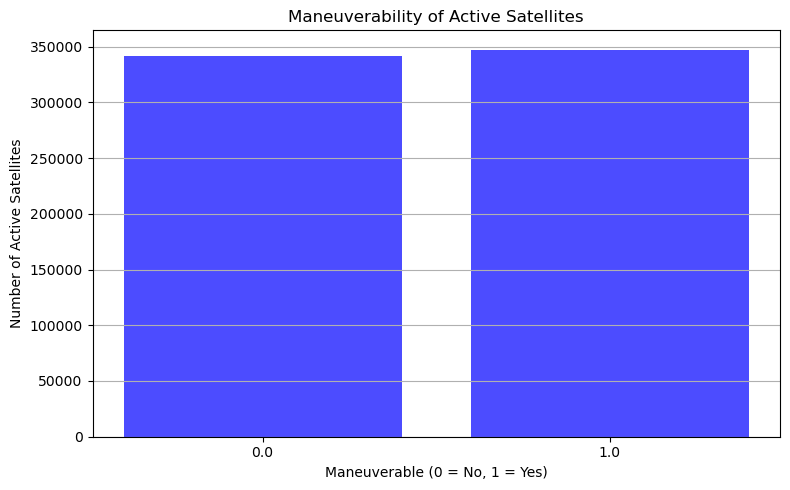

In [84]:
import matplotlib.pyplot as plt

# Filter active satellites
active_satellites = T[T['obj_type'] == 2]

# Get counts of maneuverability values
maneuver_counts = active_satellites['maneuverable'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(maneuver_counts.index.astype(str), maneuver_counts.values, color='blue', alpha=0.7)
plt.xlabel('Maneuverable (0 = No, 1 = Yes)')
plt.ylabel('Number of Active Satellites')
plt.title('Maneuverability of Active Satellites')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now we can check which filters work. 

In [64]:
# This function has been taken for pyssem and allows you to pass a list of species queries and test it. 

def assign_species_to_population(T, species_mapping):
    """
    Applies a list of pandas query strings to assign species classes to the population.
    
    :param T: pandas.DataFrame representing the population
    :param species_mapping: list of assignment strings (e.g., T.loc[...] = ...)
    :return: updated DataFrame with 'species_class' assigned
    """
    # Initialize the column
    T['species_class'] = "Unknown"

    # Apply each mapping rule via exec
    for rule in species_mapping:
        try:
            exec(rule)
        except Exception as e:
            print(f"Error applying rule: {rule}\n\t{e}")

    # Print summary of resulting species_class assignments
    print("\nSpecies class distribution:")
    print(T['species_class'].value_counts())

    # Remove all objects that are still unknown
    try:
        T = T[T['species_class'] != "Unknown"]
        print(f"\n{T['species_class'].value_counts()['Unknown']} objects/rows are being removed.")
    except KeyError:
        print("No unknown species classes found.")

    return T

In [85]:
# Now we can test different configurations

species_configuration = [
      "T.loc[(T['phase'] == 2) & (T['obj_type'] == 2) & (T['maneuverable'] == 1), 'species_class'] = 'S'",
      "T.loc[(T['obj_type'] == 2) & (T['maneuverable'] == 0), 'species_class'] = 'Sns'",
      "T.loc[(T['obj_type'] >= 3), 'species_class'] = 'N'",
      "T.loc[(T['obj_type'] == 1), 'species_class'] = 'B'"
]

# Apply the species configuration
T_new = assign_species_to_population(T, species_configuration)


Species class distribution:
species_class
S          344686
Sns        341136
N           54722
B           13212
Unknown      2536
Name: count, dtype: int64
No unknown species classes found.


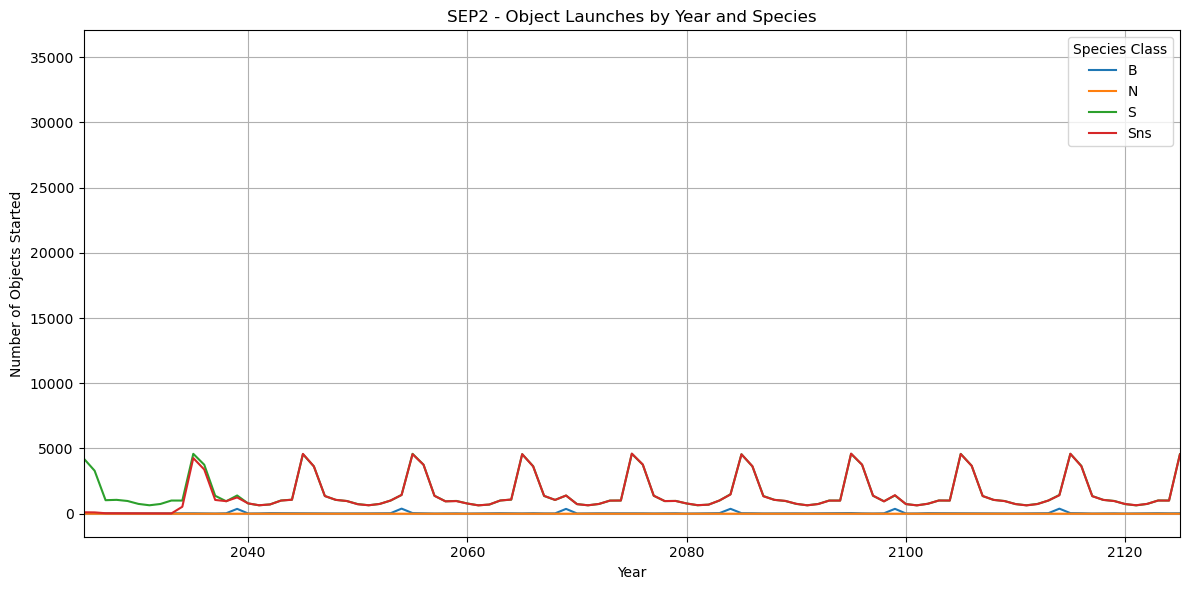

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert epoch_start_datetime to year if it's not already a column
if 'year_start' not in T_new.columns:
    T_new['year_start'] = T_new['epoch_start_datetime'].dt.year

# Group by year and species_class
launch_counts = T_new.groupby(['year_start', 'species_class']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for species in launch_counts.columns:
    plt.plot(launch_counts.index, launch_counts[species], label=species)

plt.title("SEP2 - Object Launches by Year and Species")
plt.xlabel("Year")
plt.ylabel("Number of Objects Started")
plt.xlim(2025, 2125)
plt.grid(True)
plt.legend(title="Species Class")
plt.tight_layout()
plt.show()

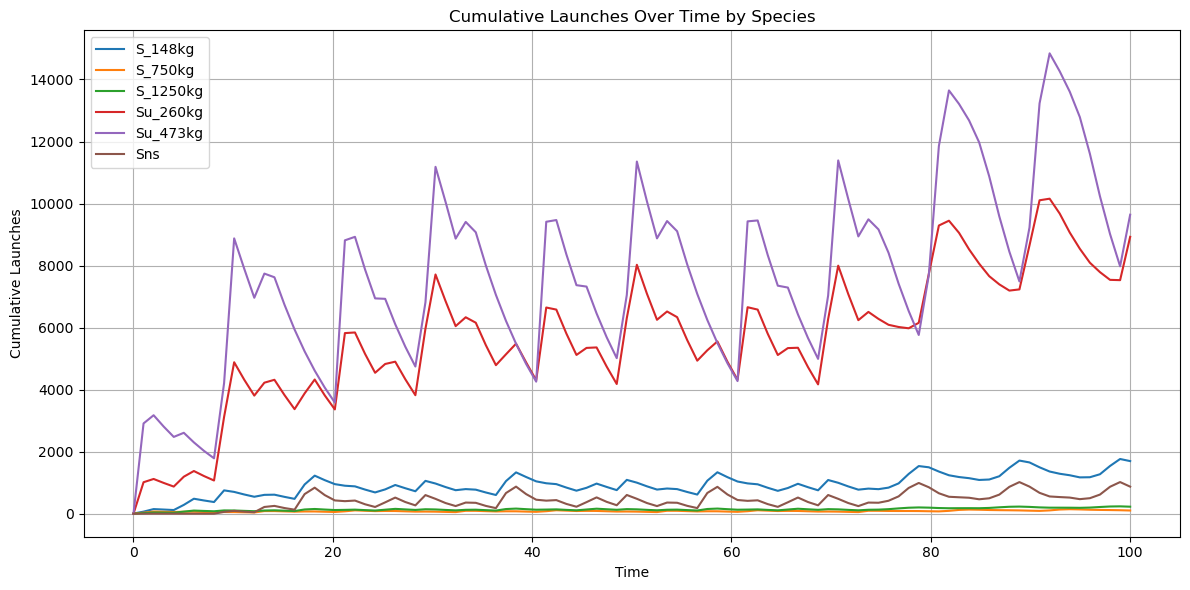

In [87]:
# load the results.json data
import json
import os
import matplotlib.pyplot as plt

# Define the path to the JSON file
json_file_path = '/Users/indigobrownhall/Code/pyssem/figures/SEP2/results.json'

# Check if the file exists
if not os.path.exists(json_file_path):
    raise FileNotFoundError(f"The file {json_file_path} does not exist.")

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract time and launch entries
times = data['times']
launch_entries = data['launch']

# Plot each species' launch counts
plt.figure(figsize=(12, 6))

for entry in launch_entries:
    species = entry['species']
    counts = entry['counts']
    plt.plot(times, counts, label=species)

plt.title('Cumulative Launches Over Time by Species')
plt.xlabel('Time')
plt.ylabel('Cumulative Launches')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Eccentric Orbits

It gets slightly more complicated for elliptical orbits, as we now have to link also to the eccentric orbits

In [69]:
T.head()

,obj_id,phase_desc,phase,par_id,operating_agency,const_name,const_shell_id,mass,area,diam_lcola,...,raan,aop,ma,eci_x,eci_y,eci_z,eci_vx,eci_vy,eci_vz,species_class
0,1,debris/derelict,4,NaN,NaN,NaN,NaN,1.47,0.0214,0.165068,...,356.7141,161.3502,206.4756,10067.157110,-569.998349,5.427363,-0.142887,4.737722,3.214775,Unknown
1,2,debris/derelict,4,NaN,NaN,NaN,NaN,9.80,0.2027,0.508021,...,261.0886,323.1294,27.7323,-1095.383555,-7026.596629,4.076188,6.469328,-1.633299,4.293850,Unknown
2,3,debris/derelict,4,NaN,NaN,NaN,NaN,31.00,0.8834,1.060556,...,216.4657,291.5768,51.6791,-6122.128723,-4532.774331,4.322777,2.854645,-5.668931,4.048007,B
3,4,debris/derelict,4,NaN,NaN,NaN,NaN,31.00,0.8834,1.060556,...,209.3806,346.2201,9.0171,-6151.632086,-3470.393250,4.078215,3.049676,-6.077413,4.626719,B
4,5,debris/derelict,4,NaN,NaN,NaN,NaN,22.70,0.2027,0.508021,...,310.9950,195.5980,158.7151,6263.862817,-7195.204310,5.100792,3.938372,3.017737,3.258920,Unknown


In [72]:
from utils.launch.launch import *

T['apogee'] = T['sma'] * (1 + T['ecc'])
T['perigee'] = T['sma'] * (1 - T['ecc'])
T['alt'] = (T['apogee'] + T['perigee']) / 2 - scen_properties.re

T_new = assign_species_to_population(T, scen_properties.SEP_mapping)

# Mapping species gets more complicated if there are elliptical orbits.
elliptical_species_flag = False
for species_group in scen_properties.species.values():
        for species in species_group:
            if species.elliptical:
                elliptical_species_flag = True

if elliptical_species_flag:
    # Assign elliptical sub-species
    for species_class in T['species_class'].unique():            
        if species_class in scen_properties.species_cells:
            T_obj_class = T[T['species_class'] == species_class].copy()
            species_cells = scen_properties.species_cells[species_class]

            if len(species_cells) == 1:
                # Only one species → assign directly
                T_obj_class['species'] = species_cells[0].sym_name
            else:
                # Multiple species → use row-wise logic
                T_obj_class['species'] = T_obj_class.apply(
                    find_species_bin,
                    axis=1,
                    args=(scen_properties, species_cells)
                )

            T_new = pd.concat([T_new, T_obj_class])
else:
    # Bin altitudes
    for species_class in T['species_class'].unique():
            if species_class in scen_properties.species_cells:
                if len(scen_properties.species_cells[species_class]) == 1:
                    T_obj_class = T[T['species_class'] == species_class].copy()
                    T_obj_class['species'] = scen_properties.species_cells[species_class][0].sym_name
                    T_new = pd.concat([T_new, T_obj_class])
                else:
                    species_cells = scen_properties.species_cells[species_class]
                    T_obj_class = T[T['species_class'] == species_class].copy()
                    T_obj_class['species'] = T_obj_class['mass'].apply(find_mass_bin, args=(scen_properties, species_cells)) 
                    T_new = pd.concat([T_new, T_obj_class])

T_new['epoch_start_datetime'] = T_new['year_start'].apply(
        lambda y: datetime(int(y), 1, 1)
    )
T_new['epoch_end_datetime'] = T_new['year_final'].apply(
    lambda y: datetime(int(y), 1, 1)
)

T_new['alt_bin'] = T_new['alt'].apply(find_alt_bin, args=(scen_properties,))

# Filter T_new to include only species present in scen_properties
T_new = T_new[T_new['species'].isin(scen_properties.species_names)]

# Initial population
x0 = T_new[T_new['epoch_start_datetime'] < scen_properties.start_date]

print(x0['species'].value_counts())

# Create a pivot table, keep alt_bin
df = x0.pivot_table(index='alt_bin', columns='species', aggfunc='size', fill_value=0)

# Create a new data frame with column names like scenario_properties.species_sym_names and rows of length n_shells
x0_summary = pd.DataFrame(index=range(scen_properties.n_shells), columns=scen_properties.species_names).fillna(0)
x0_summary.index.name = 'alt_bin'

# Merge counts into summary structure
x0_summary.update(df.reindex(columns=x0_summary.columns, fill_value=0))

# Fill remaining NaNs with 0
x0_summary.fillna(0, inplace=True)

x0_summary


Species class distribution:
species_class
N          54704
S           6906
Unknown     5892
B           2082
Name: count, dtype: int64
No unknown species classes found.
species
N_0.00141372kg_e0.01     37840
N_0.00141372kg_e0.001    10482
S                         6906
N_0.00141372kg_e0.2       3441
N_0.00141372kg_e0.1       2660
B_e0.001                   828
B_e0.2                     724
B_e0.01                    439
N_148kg_e0.2               134
B_e0.1                      91
N_6kg_e0.001                50
N_6kg_e0.01                 39
N_20kg_e0.001               22
N_148kg_e0.001              14
N_20kg_e0.01                 6
N_6kg_e0.2                   6
N_6kg_e0.1                   5
N_148kg_e0.01                3
N_20kg_e0.1                  2
Name: count, dtype: int64


/var/folders/s7/wvhpsthj2y93nhzxmj7x1zw80000gn/T/ipykernel_98292/1626940206.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x0_summary = pd.DataFrame(index=range(scen_properties.n_shells), columns=scen_properties.species_names).fillna(0)


,S,N_0.00141372kg_e0.001,N_0.00141372kg_e0.01,N_0.00141372kg_e0.1,N_0.00141372kg_e0.2,N_6kg_e0.001,N_6kg_e0.01,N_6kg_e0.1,N_6kg_e0.2,N_20kg_e0.001,...,N_20kg_e0.1,N_20kg_e0.2,N_148kg_e0.001,N_148kg_e0.01,N_148kg_e0.1,N_148kg_e0.2,B_e0.001,B_e0.01,B_e0.1,B_e0.2
alt_bin,,,,,,,,,,,,,,,,,,,,,
0,644,46,44,0,0,0,0,0,0,0,...,0,0,1,0,0,0,10,5,0,0
1,462,112,100,0,0,0,0,0,0,0,...,0,0,2,0,0,0,23,10,0,0
2,2816,158,209,0,0,0,0,0,0,1,...,0,0,5,0,0,0,27,22,0,0
3,2033,345,403,0,0,2,2,0,0,4,...,0,0,1,1,0,0,24,18,0,0
4,4,598,751,1,0,1,1,0,0,0,...,0,0,1,0,0,0,65,14,0,0
5,5,954,1433,1,0,1,0,0,0,0,...,0,0,0,0,0,0,16,12,1,0
6,19,1239,2431,2,0,3,4,0,0,0,...,0,0,0,1,0,0,18,23,0,0
7,90,1605,3270,2,0,19,6,0,0,2,...,0,0,0,0,0,0,70,21,1,0
8,0,1838,4051,1,0,5,8,0,0,0,...,0,0,0,0,0,0,41,24,1,0


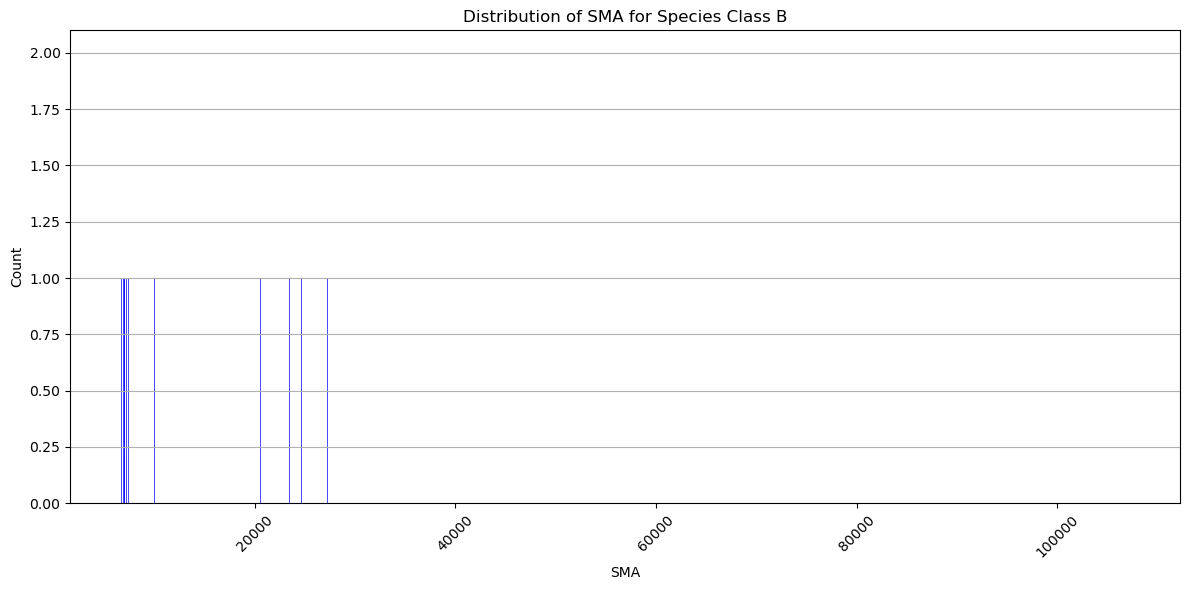

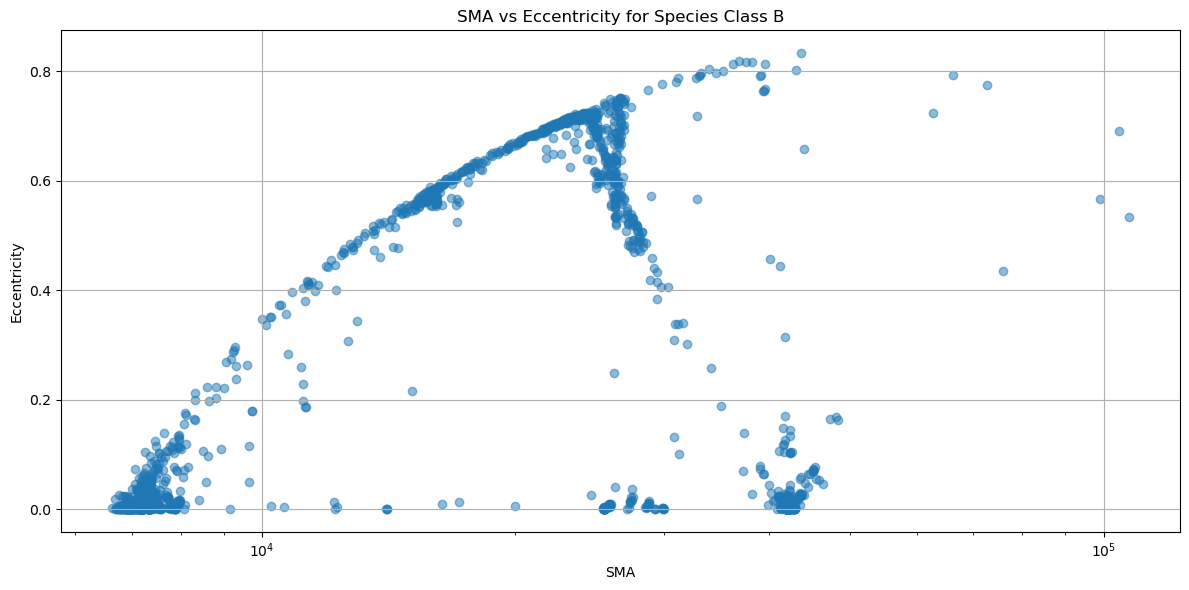

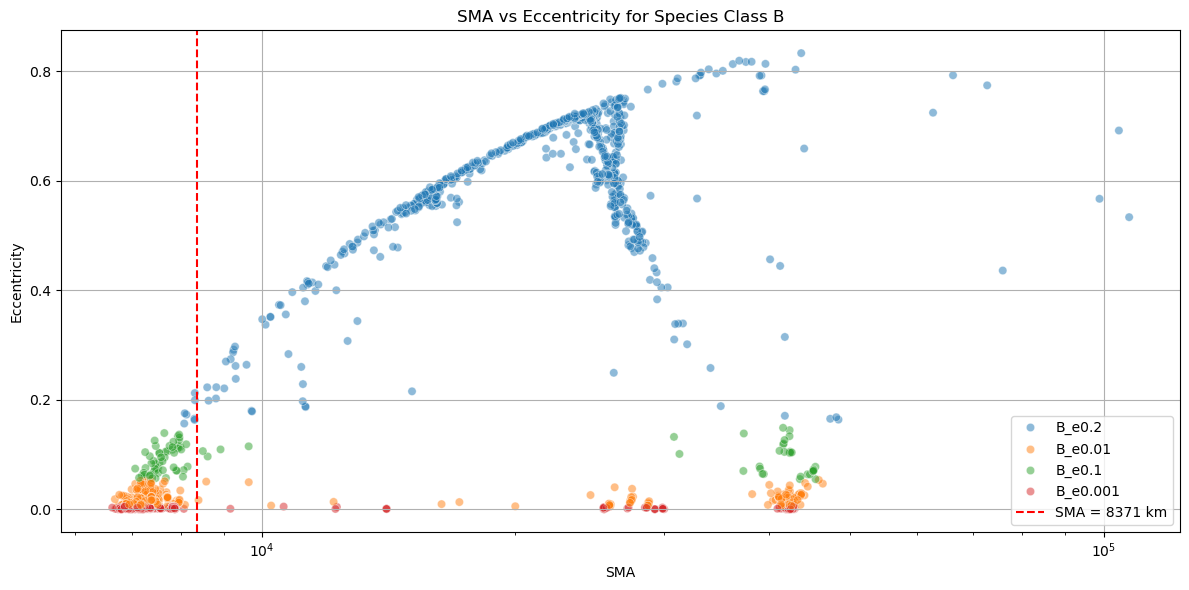

In [79]:
# plot the sma of species_class = 'B'
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for species_class 'B'
species_class_B = T_new[T_new['species_class'] == 'B']
# Get the unique SMA values and their counts
sma_counts = species_class_B['sma'].value_counts().sort_index()
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sma_counts.index, sma_counts.values, color='blue', alpha=0.7)
plt.xlabel('SMA')
plt.ylabel('Count')
plt.title('Distribution of SMA for Species Class B')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# create a scatter of their sma and ecc
plt.figure(figsize=(12, 6))
plt.scatter(species_class_B['sma'], species_class_B['ecc'], alpha=0.5)
plt.xlabel('SMA')
plt.ylabel('Eccentricity')
plt.title('SMA vs Eccentricity for Species Class B')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# create a scatter of their sma and ecc, colour by their species
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.scatterplot(data=species_class_B, x='sma', y='ecc', hue='species', alpha=0.5)
plt.axvline(x=8371, color='red', linestyle='--', label='SMA = 8371 km')  # Add vertical red line
plt.xlabel('SMA')
plt.ylabel('Eccentricity')
plt.title('SMA vs Eccentricity for Species Class B')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='species'>

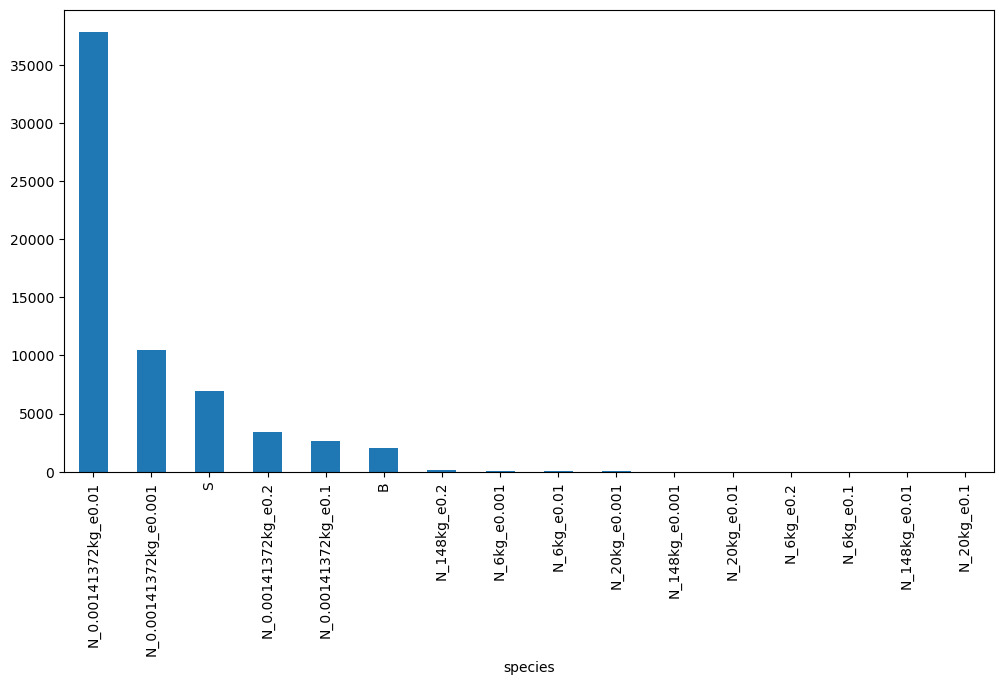

: 

In [ ]:
# counts of unique species
T_new['species'].value_counts().plot(kind='bar', figsize=(12, 6))

: 

: 

: 